#### Disclaimer: While case study is real, data is modified for educational purposes. Description: This dataset represents the Stock Price of Google incorporation between 2013-2018 years. The data is presented in csv format as follows: Date, Open, High, Low, Close, Volume, Adj Close.
#### Dataset: google-data.csv
- Task: You are asked to create a model using Facebook Prophet predict closing stock prices for the
- next 100 days. Tune the hyperparameters using Bayesian Optimization.

#### Complete your work with following steps:
- 1. Name your final work script as “Google Stock Price Prediction”.
- 2. Create repository named “Time Series with Facebook Prophet” in your GitHub account and push your script to this repository.
- 3. Fork other users’ repositories, make pull requests (at least one, making three pull requests is desirable).

#### Note: Your pull requests should either fix problems or add new features.

Tapşırıq:

1. **Disclaimer**: Case study real olsa da, məlumatlar təhsil məqsədi üçün dəyişdirilib.
2. **Təsvir**: Bu dataset, Google şirkətinin 2013-2018 illəri arasındakı səhmlərinin qiymətini təmsil edir. Məlumat CSV formatında təqdim olunub və aşağıdakı sütunlardan ibarətdir: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`, `Adj Close`.
3. **Dataset**: `google-data.csv`
4. **Tapşırıq**: Sizdən Facebook Prophet istifadə edərək sonrakı 100 gün üçün bağlanış qiymətlərini (closing stock prices) proqnozlaşdırmaq üçün model qurmağınız tələb olunur. Hiperparametrləri **Bayesian Optimization** ilə optimallaşdırın.

Tamamlamaq üçün addımlar:
- Son iş faylınızı "Google Stock Price Prediction" kimi adlandırın.
- GitHub hesabınızda "Time Series with Facebook Prophet" adlı repository yaradın və script-i bu repository-ə yükləyin.
- Digər istifadəçilərin repository-lərini fork edin, pull request-lər edin (ən az bir, üç pull request etmək məqbuldur).
- **Qeyd**: Pull request-lər ya problemləri həll etməli, ya da yeni xüsusiyyətlər əlavə etməlidir.

---

### Datasetin Sütunları:

- **Date**: Tarixi göstərir. (Format: YYYY-MM-DD)
- **Open**: Göstərilən tarixdə səhmin açılış qiymətini göstərir.
- **High**: Göstərilən tarixdə səhmin ən yüksək qiymətini göstərir.
- **Low**: Göstərilən tarixdə səhmin ən aşağı qiymətini göstərir.
- **Close**: Göstərilən tarixdə səhmin bağlanış qiymətini göstərir.
- **Volume**: Göstərilən tarixdə alınıb-satılan səhmlərin həcmini göstərir.
- **Adj Close**: Göstərilən tarixdə səhmin düzəliş edilmiş bağlanış qiymətini göstərir, dividentlər və digər korporativ tədbirlərlə düzəliş olunur.

In [1]:

import numpy as np 
import pandas as pd 
import warnings
import itertools
import numpy as np
import random
import statsmodels.api as sm
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings ("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\Python\week10\google-data.csv', parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


### 1. Check the Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


### Fill Missing Days of Dates with Interpolate method

In [4]:
data = pd.DataFrame()
data['Date'] = pd.date_range (start = df.iloc[0, 0], end =df.iloc[-1, 0]) 
data = pd.merge(data, df, on= 'Date', how = 'left') 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500.0
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500.0
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800.0
3,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in cols:
    data[col] = data[col].interpolate (method = 'cubic')

In [6]:
data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5.115500e+06
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4.666500e+06
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5.562800e+06
3,2013-01-05,363.672264,370.177059,364.091857,369.244832,369.244832,5.329146e+06
4,2013-01-06,364.524566,369.314551,364.813292,367.666599,367.666599,4.257799e+06
5,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3.332900e+06
6,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3.373900e+06


### Difference Plot

<Axes: >

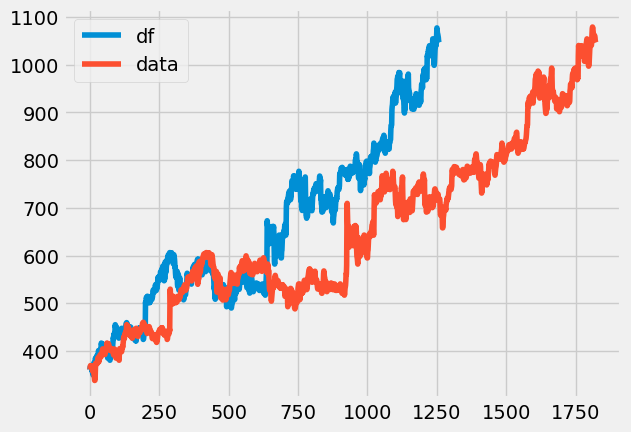

In [7]:
df.Close.plot(legend=True, label='df')
data.Close.plot(legend=True, label='data')

### Seasonal Decompose

In [8]:
# Zaman seriyasında mövsümi komponentlərin ayrılması üçün istifadə edilən seasonal_decompose funksiyasını import edir
from statsmodels.tsa.seasonal import seasonal_decompose

# 'data' DataFrame-dəki 'Close' sütunundakı dəyərləri 365 gün dövriliyinə əsaslanaraq additive (toplanma) model 
                                                                                        #ilə dekompozisiya edir.
# Bu modeldə komponentlər bir-birinə əlavə edilir (Trend + Mövsümi + Qalıq)
a = seasonal_decompose(data.Close.values, period=365, model='additive')

# 'data' DataFrame-dəki 'Close' sütunundakı dəyərləri 365 gün dövriliyinə əsaslanaraq multiplicative 
                                                                            #(çoxalma) model ilə dekompozisiya edir.
# Bu modeldə komponentlər bir-birinə vurulur (Trend * Mövsümi * Qalıq)
m = seasonal_decompose(data.Close.values, period=365, model='multiplicative')


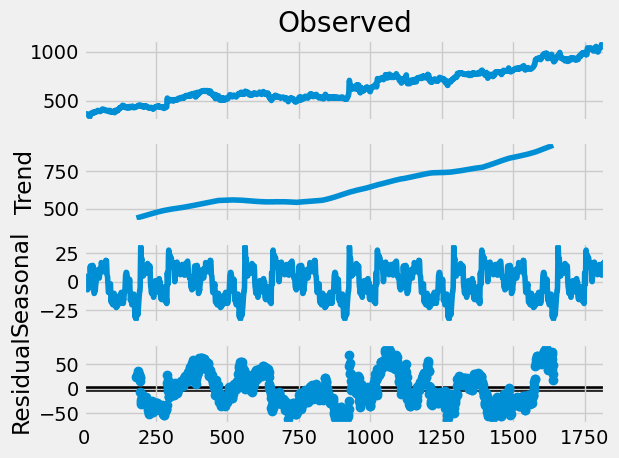

In [9]:
a.plot()
plt.show()

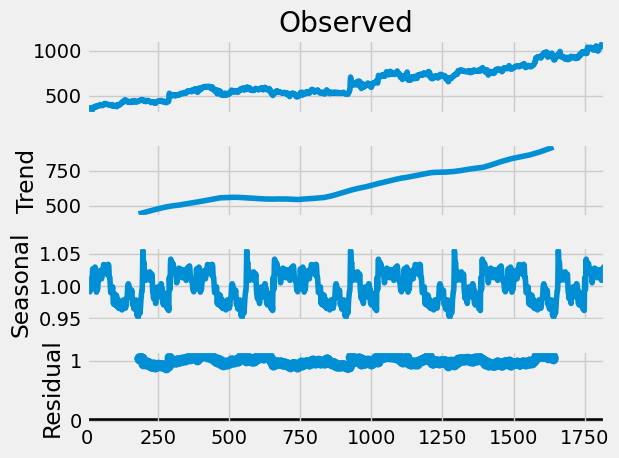

In [10]:
m.plot()
plt.show()

In [11]:
# Augmented Dickey-Fuller (ADF) testini import edir, stasionarlığı yoxlamaq üçün istifadə olunur
from statsmodels.tsa.stattools import adfuller

# Zaman seriyası üzərində ADF testini yerinə yetirən funksiyanı təyin edir
def st_check(timeseries):
    # ADF testini zaman seriyası üzərində icra edir və autolag metodunu AIC olaraq təyin edir
    dftest = adfuller(timeseries, autolag = 'AIC')
    
    # ADF testinin nəticələrini 'Test statistic', 'p-value', '#Lags Used', 'Number of Observations Used' 
                                                                                                    #kimi etiketləyir
    dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', '#Lags Used', 
                                                'Number of Observations Used']) 
    
    # ADF testinin kritik dəyərlərini (1%, 5%, 10%) dövrə daxil edərək onları dfoutput seriyasına əlavə edir
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    
    # Yaradılmış seriyanı çap edir, ADF testinin nəticələrini göstərir
    print(dfoutput)

# 'data' DataFrame-də olan 'Close' sütunu üzrə ADF testini işə salır
st_check(data.Close)

Test statistic                   -0.232731
p-value                           0.934506
#Lags Used                        5.000000
Number of Observations Used    1817.000000
Critical Value (1%)              -3.433954
Critical Value (5%)              -2.863132
Critical Value (10%)             -2.567618
dtype: float64


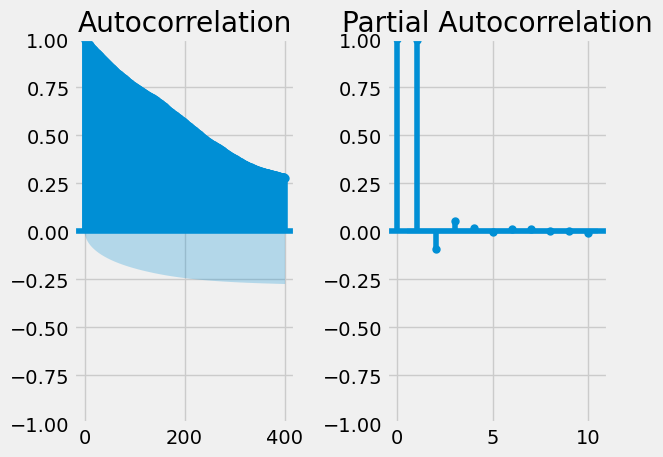

In [12]:
# statsmodels modulu olaraq smt qısaltmasını təyin edir
import statsmodels.graphics.tsaplots as smt
import matplotlib.pyplot as plt

# Subplotlar üçün grid layoutu təyin edir
l = (1, 2)
a = plt.subplot2grid(l, (0,0))
p = plt.subplot2grid(l, (0,1))

# Autocorrelation Function (ACF) qrafikini çəkir
smt.plot_acf(data.Close, lags=400, ax=a, alpha=0.5)

# Partial Autocorrelation Function (PACF) qrafikini çəkir
smt.plot_pacf(data.Close, lags=10, ax=p, alpha=0.5)

# Qrafiklərin sıx yerləşdirilməsi üçün tənzimləmə
plt.tight_layout()


### Selection Feature

In [13]:
model_df = data.loc[:, ['Date', 'Close']].rename(columns = {"Date":"ds", "Close":"y"})
model_df.head()

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-05,369.244832
4,2013-01-06,367.666599


### Creat Model

In [14]:
model = Prophet(yearly_seasonality=True, interval_width = 0.95)
model.fit (model_df)

19:32:04 - cmdstanpy - INFO - Chain [1] start processing
19:32:08 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [15]:
future = model.make_future_dataframe (periods = 100)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1918,2018-04-04,1115.231400,1036.361023,1193.835047
1919,2018-04-05,1114.342305,1035.948996,1201.026007
1920,2018-04-06,1114.489808,1033.715586,1199.704188
1921,2018-04-07,1114.548169,1042.335382,1203.256370
1922,2018-04-08,1114.349410,1033.061364,1203.282973


### Forecast Plot

Text(0.5, 1.0, 'Google Stock Prices')

<Figure size 1600x800 with 0 Axes>

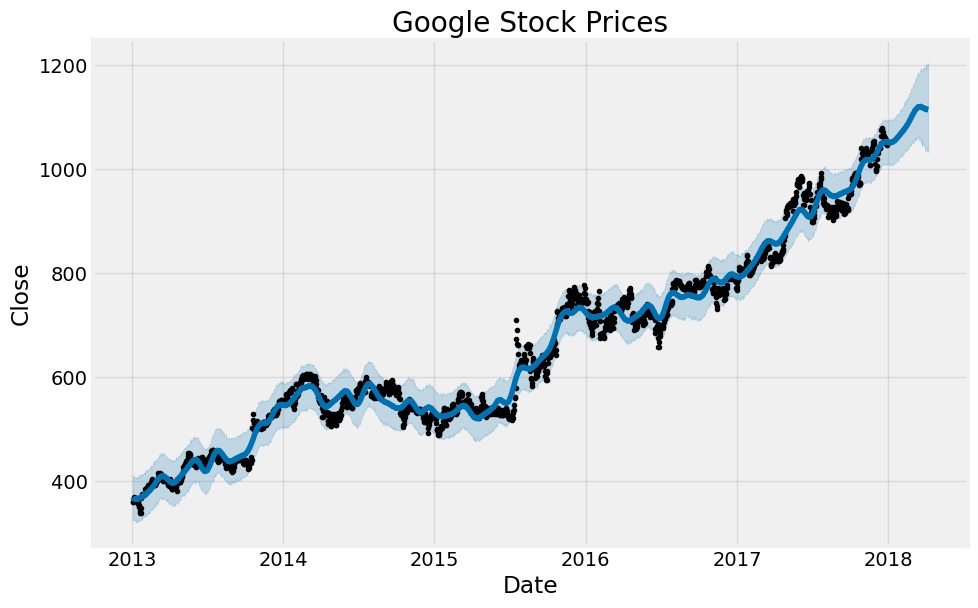

In [16]:
plt.figure(figsize = (16,8))
model.plot(forecast, xlabel = 'Date', ylabel='Close') 
plt.title('Google Stock Prices')

### Plot Components

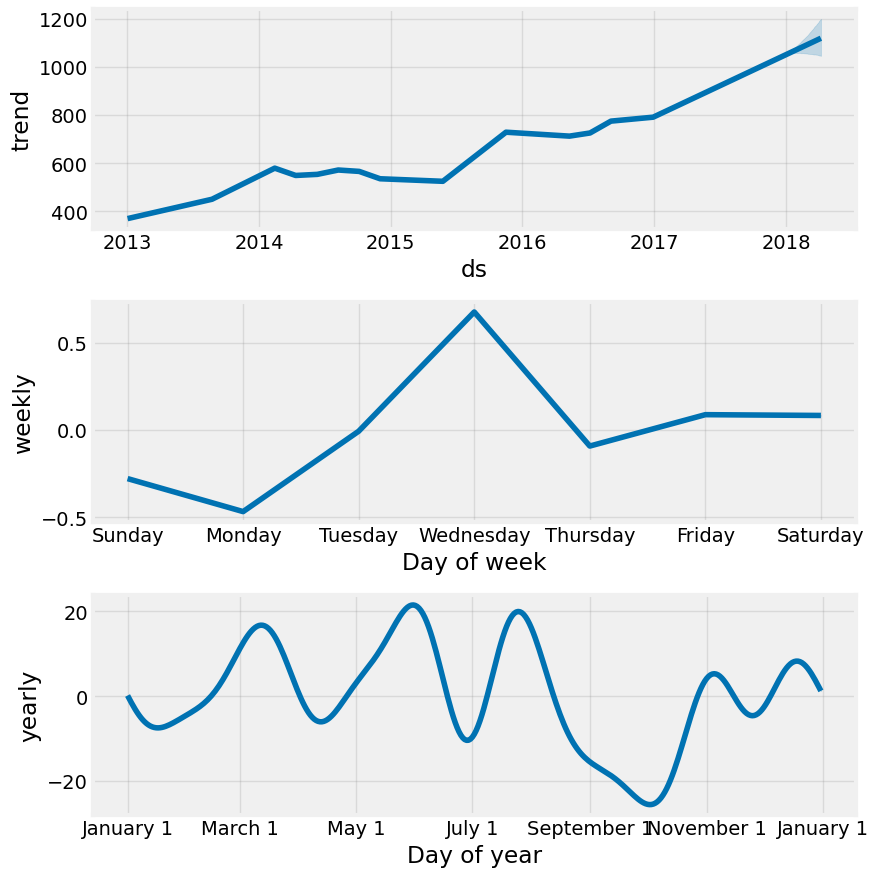

In [17]:
fig = model.plot_components(forecast)
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

y_true = model_df['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast['yhat'][:len(model_df['y'])] # Proqnozlaşdırılan dəyərlər
    
#Performans metriklərini hesablayın
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)

# Metrikləri göstərin
print(f"R2 {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMAE: {rmse}")

R2 0.9847529433133674
MAE: 17.316910434784152
MSE: 470.2116143717874
RMAE: 21.68436336099788


### BayesianOptimization

In [19]:
# !pip install bayesian-optimization 

In [20]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from bayes_opt import BayesianOptimization

# Modelin optimizasiyası üçün funksiya təyin edir
def optimization_function(changepoint_prior_scale, n_changepoints, holidays_prior_scale, seasonality_mode):
    
    # seasonality_mode ədədi dəyərini müvafiq mətn formatına çevir
    if seasonality_mode == 0:
        seasonality_mode_str = 'additive'
    else:
        seasonality_mode_str = 'multiplicative'
    
    model = Prophet(changepoint_prior_scale=changepoint_prior_scale, 
                    n_changepoints=int(n_changepoints),
                    holidays_prior_scale=holidays_prior_scale,
                    seasonality_mode=seasonality_mode_str)  # Prophet mdelini qurur
    model.fit(model_df)  # Məlumatı modelə uyğunlaşdırır
    
    # Modeli cross-validation metodundan keçirir
    cross_val = cross_validation(model, horizon='100 days', parallel='processes')
    
    # Cross-validation nəticələrinə əsasən performans metriklərini hesablayır
    perf_m = performance_metrics(cross_val, rolling_window=1)

    # RMSE dəyərini qaytarır
    rmse = (perf_m['rmse'].values[0])
    
    return -rmse  # Bayes optimizasiyası minimallaşdırmağa çalışır, ona görə -RMSE qaytarır

# Optimizasiya parametrlərini təyin edin
parameters = {
            "changepoint_prior_scale" : [0.1, 0.2],
            "n_changepoints" : [1, 5],
            "holidays_prior_scale" : [0.1, 0.2],
#             "seasonality_mode" : ['multiplicative', 'additive']
            "seasonality_mode": (0, 1)  # 0: additive, 1: multiplicative
            }

# BayesianOptimization obyektini yaradın
optimizer = BayesianOptimization(
    f=optimization_function,  # Optimizasiya ediləcək funksiya
    pbounds=parameters,  # Parametrlərin aralığı
    random_state=42  # Təsadüfi vəziyyət
)

# Optimizasiyanı yerinə yetirin
optimizer.maximize(
    init_points=5,  # Başlanğıc nöqtələrinin sayı
    n_iter=20,  # İterasiya sayısı
)

# Nəticələri çap edin
print(optimizer.max)  # Ən yaxşı tapılan dəyəri göstərir


|   iter    |  target   | change... | holida... | n_chan... | season... |
-------------------------------------------------------------------------


19:32:16 - cmdstanpy - INFO - Chain [1] start processing
19:32:16 - cmdstanpy - INFO - Chain [1] done processing


| 1         | -93.4     | 0.1375    | 0.1951    | 3.928     | 0.5987    |


19:32:29 - cmdstanpy - INFO - Chain [1] start processing
19:32:29 - cmdstanpy - INFO - Chain [1] done processing


| 2         | -88.43    | 0.1156    | 0.1156    | 1.232     | 0.8662    |


19:32:39 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing


| 3         | -88.78    | 0.1601    | 0.1708    | 1.082     | 0.9699    |


19:32:52 - cmdstanpy - INFO - Chain [1] start processing
19:32:52 - cmdstanpy - INFO - Chain [1] done processing


| 4         | -88.89    | 0.1832    | 0.1212    | 1.727     | 0.1834    |


19:33:01 - cmdstanpy - INFO - Chain [1] start processing
19:33:01 - cmdstanpy - INFO - Chain [1] done processing


| 5         | -113.0    | 0.1304    | 0.1525    | 2.728     | 0.2912    |


19:33:14 - cmdstanpy - INFO - Chain [1] start processing
19:33:15 - cmdstanpy - INFO - Chain [1] done processing


| 6         | -83.96    | 0.2       | 0.2       | 1.0       | 0.0       |


19:33:29 - cmdstanpy - INFO - Chain [1] start processing
19:33:30 - cmdstanpy - INFO - Chain [1] done processing


| 7         | -107.0    | 0.2       | 0.1       | 5.0       | 1.0       |


19:33:45 - cmdstanpy - INFO - Chain [1] start processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing


| 8         | -84.4     | 0.1       | 0.2       | 4.507     | 0.0       |


19:34:01 - cmdstanpy - INFO - Chain [1] start processing
19:34:02 - cmdstanpy - INFO - Chain [1] done processing


| 9         | -81.47    | 0.2       | 0.1       | 5.0       | 0.0       |


19:34:16 - cmdstanpy - INFO - Chain [1] start processing
19:34:16 - cmdstanpy - INFO - Chain [1] done processing


| 10        | -88.24    | 0.1       | 0.1       | 1.0       | 0.4122    |


19:34:33 - cmdstanpy - INFO - Chain [1] start processing
19:34:33 - cmdstanpy - INFO - Chain [1] done processing


| 11        | -88.96    | 0.2       | 0.2       | 1.879     | 1.0       |


19:34:46 - cmdstanpy - INFO - Chain [1] start processing
19:34:46 - cmdstanpy - INFO - Chain [1] done processing


| 12        | -89.0     | 0.2       | 0.1       | 3.97      | 0.0       |


19:34:59 - cmdstanpy - INFO - Chain [1] start processing
19:35:00 - cmdstanpy - INFO - Chain [1] done processing


| 13        | -83.17    | 0.1       | 0.2       | 1.352     | 0.0       |


19:35:13 - cmdstanpy - INFO - Chain [1] start processing
19:35:13 - cmdstanpy - INFO - Chain [1] done processing


| 14        | -76.63    | 0.1       | 0.2       | 5.0       | 0.0       |


19:35:29 - cmdstanpy - INFO - Chain [1] start processing
19:35:30 - cmdstanpy - INFO - Chain [1] done processing


| 15        | -105.8    | 0.1405    | 0.1156    | 4.237     | 0.1831    |


19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing


| 16        | -83.39    | 0.1       | 0.2       | 4.828     | 0.1839    |


19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing


| 17        | -89.0     | 0.2       | 0.2       | 3.544     | 0.0       |


19:36:15 - cmdstanpy - INFO - Chain [1] start processing
19:36:16 - cmdstanpy - INFO - Chain [1] done processing


| 18        | -94.85    | 0.2       | 0.1       | 3.425     | 1.0       |


19:36:28 - cmdstanpy - INFO - Chain [1] start processing
19:36:28 - cmdstanpy - INFO - Chain [1] done processing


| 19        | -83.51    | 0.1099    | 0.181     | 4.216     | 0.9752    |


19:36:43 - cmdstanpy - INFO - Chain [1] start processing
19:36:43 - cmdstanpy - INFO - Chain [1] done processing


| 20        | -84.22    | 0.1185    | 0.1887    | 4.208     | 0.9758    |


19:36:57 - cmdstanpy - INFO - Chain [1] start processing
19:36:58 - cmdstanpy - INFO - Chain [1] done processing


| 21        | -84.4     | 0.1       | 0.2       | 4.786     | 0.0       |


19:37:13 - cmdstanpy - INFO - Chain [1] start processing
19:37:13 - cmdstanpy - INFO - Chain [1] done processing


| 22        | -83.39    | 0.1       | 0.1       | 4.444     | 0.8324    |


19:37:28 - cmdstanpy - INFO - Chain [1] start processing
19:37:28 - cmdstanpy - INFO - Chain [1] done processing


| 23        | -88.35    | 0.1089    | 0.1116    | 1.002     | 0.4017    |


19:37:40 - cmdstanpy - INFO - Chain [1] start processing
19:37:40 - cmdstanpy - INFO - Chain [1] done processing


| 24        | -83.38    | 0.1011    | 0.1832    | 4.788     | 0.003113  |


19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing


| 25        | -81.93    | 0.1       | 0.1       | 5.0       | 0.1858    |
{'target': -76.62692448470817, 'params': {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5.0, 'seasonality_mode': 0.0}}


### Creat Model

In [21]:
model = Prophet(yearly_seasonality=True, interval_width = 0.95, changepoint_prior_scale=0.1, \
                holidays_prior_scale=0.2, n_changepoints=5, seasonality_mode='additive')
model.fit (model_df)

19:38:04 - cmdstanpy - INFO - Chain [1] start processing
19:38:04 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [22]:
future = model.make_future_dataframe (periods = 100)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1918,2018-04-04,1109.690050,1038.782399,1174.089580
1919,2018-04-05,1108.585696,1037.444722,1176.604844
1920,2018-04-06,1108.522222,1040.739724,1182.011105
1921,2018-04-07,1108.403116,1041.850313,1178.031631
1922,2018-04-08,1107.994210,1043.068866,1175.395252


### Forecast Plot

Text(0.5, 1.0, 'Google Stock Prices')

<Figure size 1600x800 with 0 Axes>

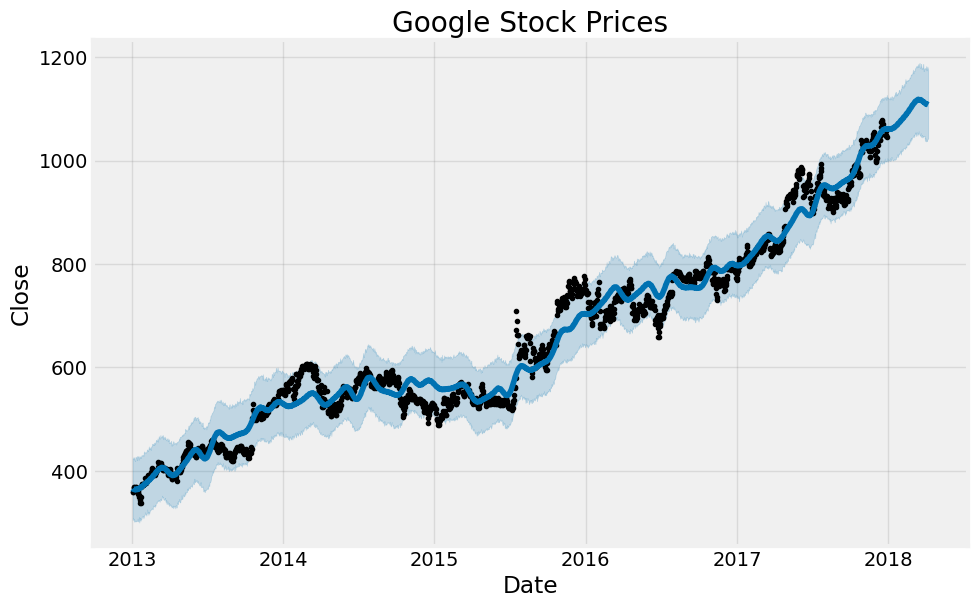

In [23]:
plt.figure(figsize = (16,8))
model.plot(forecast, xlabel = 'Date', ylabel='Close') 
plt.title('Google Stock Prices')

### Plot Components

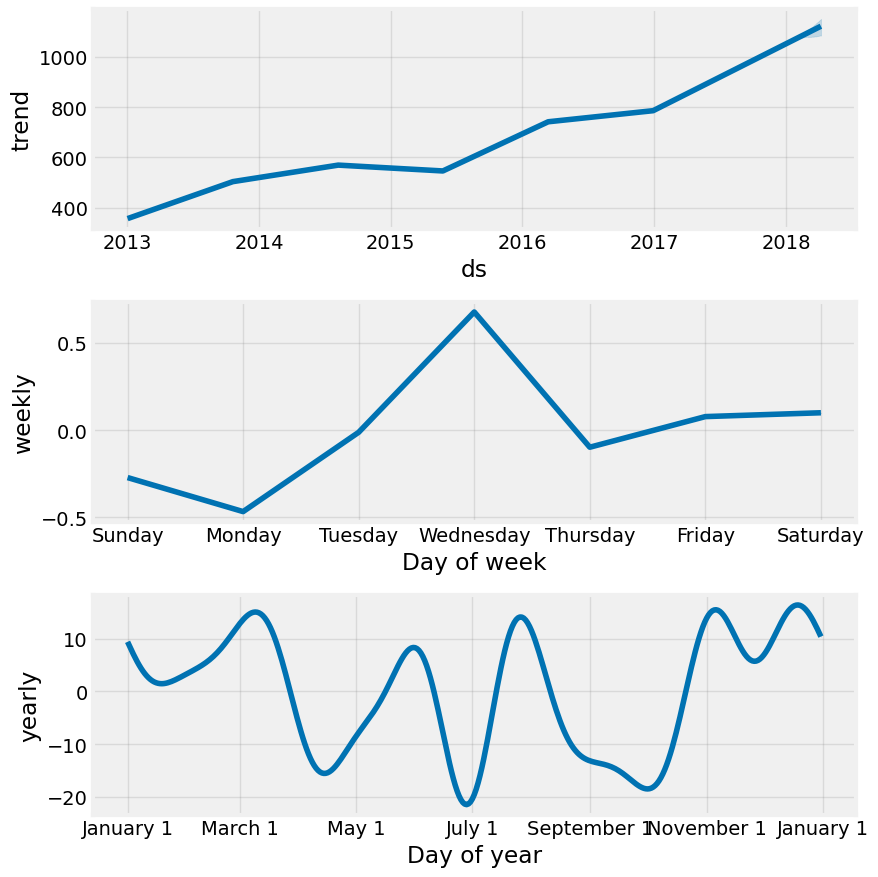

In [24]:
fig = model.plot_components(forecast)
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

y_true = model_df['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast['yhat'][:len(model_df['y'])] # Proqnozlaşdırılan dəyərlər
    
#Performans metriklərini hesablayın
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)

# Metrikləri göstərin
print(f"R2 {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMAE: {rmse}")

R2 0.9688226981519641
MAE: 24.62514592779148
MSE: 961.492420145205
RMAE: 31.007941243255814
